In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
df.shape

(2831603, 11)

In [8]:
df.columns.values

array(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'], dtype=object)

In [9]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.831603e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06
mean,1.180058e+02,1.568998e+05,8.481636e+05,8.694701e+05,9.932999e+05,1.101131e+06,8.952529e-04,3.531570e-07
std,7.399918e+01,2.656039e+05,2.924614e+06,2.960980e+06,2.298450e+06,2.382621e+06,2.990739e-02,5.942701e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000e+01,1.238824e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.390000e+02,7.584129e+04,1.475700e+04,0.000000e+00,1.365850e+05,2.225718e+05,0.000000e+00,0.000000e+00
75%,1.830000e+02,2.108893e+05,1.145577e+05,1.536422e+05,9.429538e+05,1.128385e+06,0.000000e+00,0.000000e+00
max,2.260000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,1.000000e+00


In [13]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,2829067
1.0,2535


Handling missing data

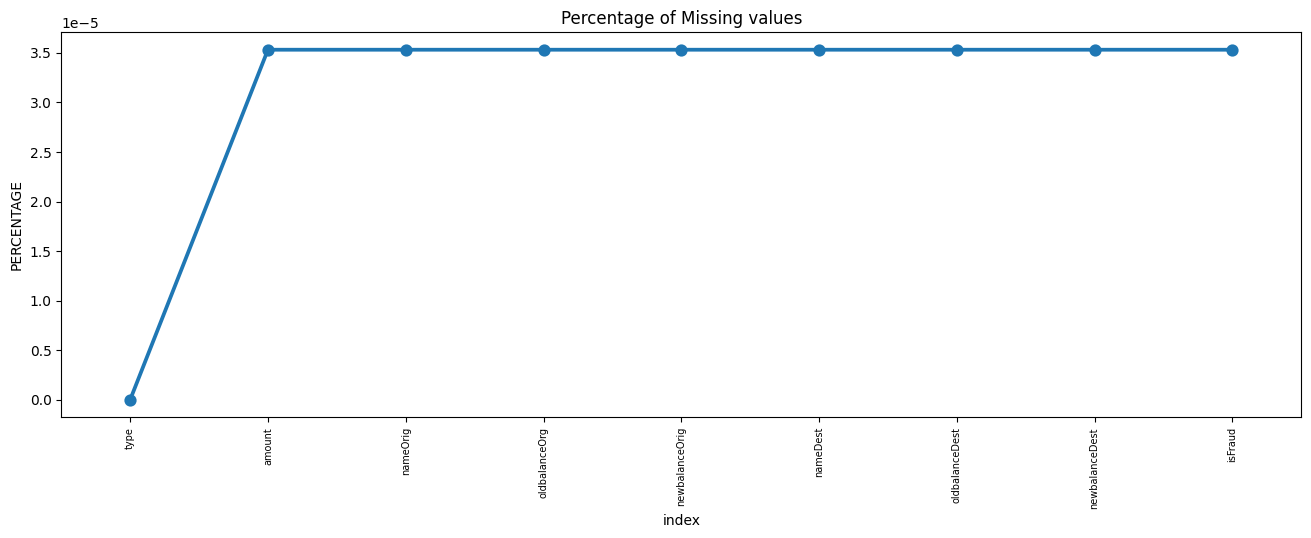

In [46]:
import seaborn as sns
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [45]:
df= df.drop(columns=['isFlaggedFraud','step'])

In [47]:
df = df.dropna(subset=df.columns.difference(['type']))

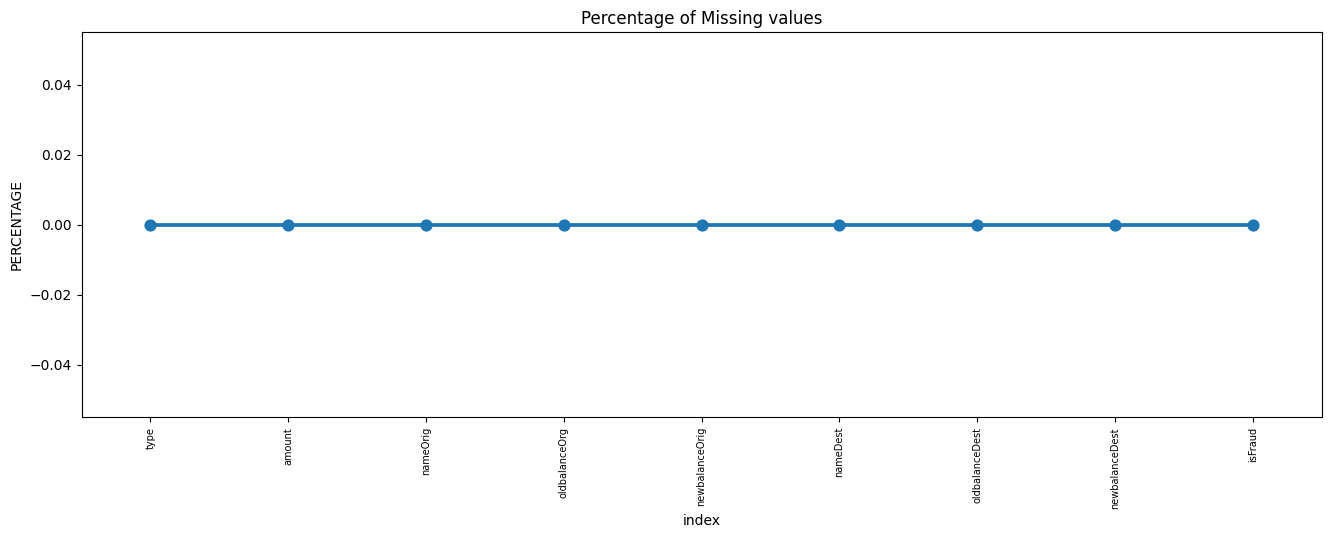

In [48]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Target variable

Text(0.5, 1.02, 'Count of TARGET Variable per category')

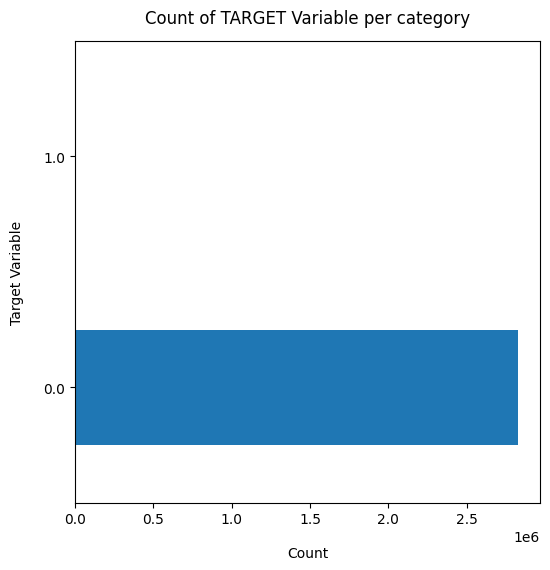

In [51]:
import matplotlib.pyplot as plt
df['isFraud'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [52]:
100*df['isFraud'].value_counts()/len(df['isFraud'])

,count
isFraud,
0.0,99.910475
1.0,0.089525


Random down sampling

In [57]:
from sklearn.utils import resample

# Separate the majority (non-fraud) and minority (fraud) classes
df_majority = df[df['isFraud'] == 0]
df_minority = df[df['isFraud'] == 1]

# Downsample the majority class to match the size of the minority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement
                                   n_samples=len(df_minority),  # Match minority class
                                   random_state=42)

# Combine the downsampled majority class with the minority class
df_new = pd.concat([df_majority_downsampled, df_minority])

In [58]:
df_new['isFraud'].value_counts()

,count
isFraud,
0.0,2535
1.0,2535


In [67]:
df_new.to_csv('balanced_dataset_50_50.csv', index=False)